In [1]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
from tensorflow.keras import datasets, layers, utils, Sequential, Model
import matplotlib.pyplot as plt

from utils import *

# Dataset

In [2]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()
train_x = train_x.reshape([train_x.shape[0], -1]) / 255.
test_x = test_x.reshape([test_x.shape[0], -1]) / 255.

train_y = utils.to_categorical(train_y, 10)
test_y = utils.to_categorical(test_y, 10)

print(train_x.shape, test_x.shape)

(60000, 784) (10000, 784)


# Model

In [3]:
class NN(tf.keras.Model):
    
    def __init__(self, inputs_shape= 28 * 28):
        super(NN, self).__init__()

        self.inputs_shape = inputs_shape
        
        self.fc1 = layers.Dense(256, activation="relu", kernel_initializer='glorot_uniform')
        self.fc2 = layers.Dense(128, activation="relu", kernel_initializer='glorot_uniform')
        self.fc3 = layers.Dense(10, activation="softmax", kernel_initializer='glorot_uniform')
    
    def call(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

    def build_model(self):
        x = layers.Input(shape=self.inputs_shape)
        return Model(inputs=[x], outputs = self.call(x))

In [4]:
model = NN()
model.build_model()
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [5]:
model.fit(train_x, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.9817 - accuracy: 0.7422
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3022 - accuracy: 0.9152
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2424 - accuracy: 0.9298
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2039 - accuracy: 0.9424
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1751 - accuracy: 0.9509
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1597 - accuracy: 0.9546
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1407 - accuracy: 0.9596
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1278 - accuracy: 0.9641
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1156 - accuracy: 0.9678
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.105

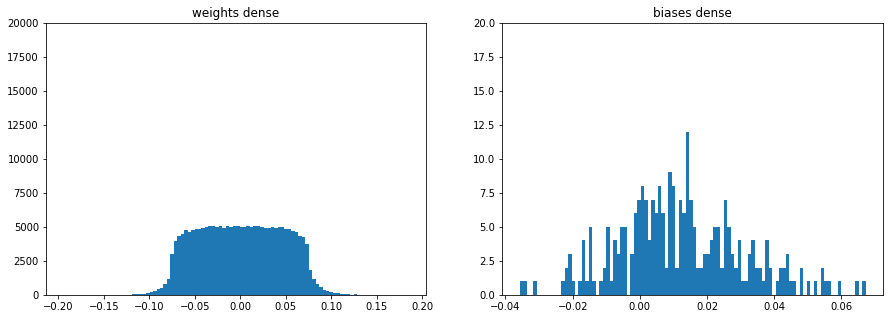

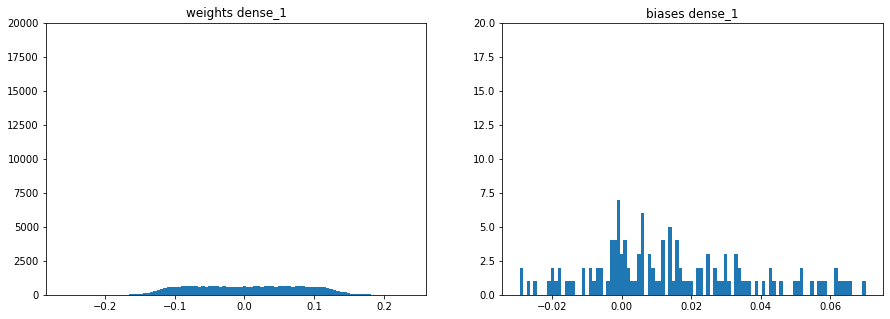

In [6]:
plot_wb(model)